# **Practical Exercise. Analysis of Metrics for Optimizing Supervised Regression and Classification Models**

## **Author: Gregorio Mendoza Serrano**

In this practical exercise, we will study how to use the metrics previously studied in theory to solve practical problems.

The competencies associated with these teaching units are as follows:

- Students should have the ability to gather and interpret relevant data to make judgments that include reflection in the field of machine learning.

- Design an experimental framework considering the most appropriate methods for data capture, processing, storage, analysis, and visualization.

- Combine mathematical, statistical, and programming fundamentals to develop solutions to problems in the field of data science.

The objectives we aim to achieve with this practical notebook are:

- Gain a clear understanding of the metrics that measure the performance of supervised machine learning models for regression and classification.

- Work on related points in machine learning, such as cross-validation, overfitting/underfitting issues, and data balancing problems.

- Work with, understand, evaluate, compare, and interpret the main metrics in different machine learning algorithms for regression and classification applied to real-world problems.

## Description of the Exercise

In this notebook, we will complete 2 exercises: one for regression and another for classification using the [sklearn](https://scikit-learn.org/stable/) framework. In each of them, we will follow the steps mentioned below.


### Exercise 1 - Regression Performance Metrics

1. **Select a dataset to work with from the two mentioned below.**

______________________________________________________________________

**Available Datasets:**

**1. Boston House Price Dataset**  
Predict the price of a house based on a set of measures.

**Download**: [Boston Housing Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data)

**Note:** One way to download files with a `.data` extension is to execute the following line in a Jupyter cell:

```python
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

!cat housing.data | head

df = pd.read_csv('housing.data', sep=your_separator, names=[name_columns])
```

**Note**: There are other ways to download this dataset: [sklearn Boston dataset](https://scikit-learn.org/0.15/modules/generated/sklearn.datasets.load_boston.html)

**More field information:** [Boston Housing Data Details](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

---

**2. Abalone Dataset:**  
Predict the age of an abalone given a series of measurements.

**Download**: [Abalone Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data)

**More field information:** [Abalone Dataset Information](https://archive.ics.uci.edu/ml/datasets/Abalone)

______________________________________________________________________

2. Load the chosen dataset, clean it, preprocess it, and prepare it for applying regression techniques.

3. Split the dataset into training and test sets. It will be valued if cross-validation techniques are applied.

4. Perform regression using at least 2 different algorithms studied in the master's program. The most important aspect here will be to obtain the metrics reviewed that best apply according to the problem context and the criteria followed by the student. Use at least 2 or 3 metrics.

5. Once you have obtained the relevant metrics for the problem, interpret them considering everything covered in theory. Based on the metrics obtained, which of the two algorithms performed better?

6. Adjust the hyperparameters of the algorithms used to try to improve the obtained metrics. Was any improvement achieved? Explain why.

7. Do you think overfitting/underfitting occurs? Why?

______________________________________________________________________

Note: The dataset chosen for this section is the **Boston Housing Price Dataset**.

In [39]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

!cat housing.data | head

--2024-05-22 18:45:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘housing.data.1’

housing.data.1          [  <=>               ]  47.93K   150KB/s    in 0.3s    

2024-05-22 18:45:12 (150 KB/s) - ‘housing.data.1’ saved [49082]

 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60
 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70
 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40
 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20
 0.02985 

______________________________________________________________________

#### 2. Load the chosen dataset, clean it, preprocess it, and prepare it for applying regression techniques

We import the libraries that will be used during this part of the exercise:

In [40]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

We install the Plotly library, which will help us visualize the correlation matrices:

In [41]:
!pip install plotly
import plotly.express as px

The 14 features present in the **Boston Housing Price Dataset** are as follows:

- **CRIM**: Per capita crime rate by town.

- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.

- **INDUS**: Proportion of non-retail business acres per town.

- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).

- **NOX**: Nitric oxides concentration (parts per 10 million).

- **RM**: Average number of rooms per dwelling.

- **AGE**: Proportion of owner-occupied units built prior to 1940.

- **DIS**: Weighted distances to five Boston employment centers.

- **RAD**: Index of accessibility to radial highways.

- **TAX**: Full-value property-tax rate per $10,000.

- **PTRATIO**: Pupil-teacher ratio by town.

- **B**: 1000(Bk - 0.63)² where Bk is the proportion of blacks by town.

- **LSTAT**: % lower status of the population.

- **MEDV**: Median value of owner-occupied homes in $1000's.

The target feature to predict in this study will be **MEDV**, as it contains the object of study: the median price of housing.

We found that the dataset has a fixed-width field format. Therefore, we need to manually specify this to Pandas so that it can process it correctly:

In [42]:
# Definimos los anchos de campo en el vector widths:
widths = [8, 7, 8, 3, 8, 8, 7, 8, 4, 7, 7, 7, 7, 7]

# Introducimos los nombres de las columnas:
name_columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

df = pd.read_fwf('housing.data', widths=widths, header=None)

We remove duplicate and null values and display the `.head()` of the dataset on the screen:

In [43]:
# Eliminamos registros nulos y duplicados:
df = df.drop_duplicates().dropna()

# Presentamos por pantalla la cabecera:
print('Shape of processed Pandas list =',df.shape)

# Asignar los nuevos nombres de columnas
df.columns = name_columns

# Mostrar el DataFrame después de renombrar las columnas
print("\nDataFrame con columnas nombradas:")
df.head()

Shape of processed Pandas list = (506, 14)

DataFrame con columnas nombradas:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Let's display the basic description of the different features:

In [44]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We draw the correlation matrix to study interdependencies:

In [45]:
df_corr = df.corr()
fig = px.imshow(df_corr, color_continuous_scale='Viridis', labels=dict(color='Correlación'))
fig.update_layout(title='Matriz de Correlación', width=600, height=550)
fig.show()

We can observe collinearity among some of the features. Additionally, we can see that some of them have a relatively low correlation with **MEDV**.

We will remove the features that have a correlation of < 0.2 with **MEDV**.

In [46]:
# Obtener la columna de correlaciones entre 'Label' y todas las demás características
correlaciones_MEDV = df_corr.loc['MEDV']

# Filtrar las características con una correlación menor que 0.2 con 'MEDV':
caracteristicas_a_eliminar = correlaciones_MEDV[abs(correlaciones_MEDV) < 0.2].index.tolist()

# Crear un dataframe filtrado sin las características a eliminar:
df_filtered = df.drop(columns=caracteristicas_a_eliminar)

# Mostrar las características eliminadas
print("Características eliminadas:")
print(caracteristicas_a_eliminar)
print("Número de características eliminadas:")
print(len(caracteristicas_a_eliminar))

Características eliminadas:
['CHAS']
Número de características eliminadas:
1


The feature **'CHAS'** was removed due to its low correlation (approximately 0.175) with the target variable. In order to determine if any other variables can be discarded, we will conduct a variance analysis:

In [47]:
# Calcular la varianza de cada característica en df_ids_filtered
df_ids_var = df_filtered.drop(columns='MEDV')
variances = df_ids_var.var()

# Imprimir los valores de varianza de todas las características
print("Valores de Varianza de Todas las Características:")
print(variances)

Valores de Varianza de Todas las Características:
CRIM          73.986578
ZN           543.936814
INDUS         47.064442
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
dtype: float64


The only variable that stands out for its low variance compared to the others is **NOX**; however, it was decided not to eliminate it because it has an acceptable correlation (approximately -0.47) with the target variable. 

Looking again at the correlation matrix, we observe that the following features are highly correlated with one or more others, so they will be removed:

- **DIS**: Highly correlated (>0.7) with **NOX** and **AGE**.
- **RAD**: Highly correlated (>0.9) with **TAX**.
- **INDUS**: Highly correlated (>0.7) with **NOX** and **TAX**.

In [48]:
# Crear un dataframe filtrado sin las características a eliminar:
df_filtered = df_filtered.drop(columns=['DIS','RAD', 'INDUS'])

We re-plot the correlation matrix with the remaining features:

In [49]:
df_filtered_corr = df_filtered.corr()
fig = px.imshow(df_filtered_corr, color_continuous_scale='Viridis', labels=dict(color='Correlación'))
fig.update_layout(title='Matriz de Correlación', width=600, height=550)
fig.show()

______________________________________________________________________

**Note:** Sections 3 and 4 are carried out together in this block of the problem:

#### 3. Split the dataset into training and test sets. Cross-validation techniques will be valued.

#### 4. Perform regression using at least 2 different algorithms. The most important aspect here will be to obtain the metrics reviewed that best apply according to the problem context and the criteria followed. Use at least 2 or 3 metrics.

We define the two regression models that we will use in this section:

- **MLPRegressor** (multi-layer perceptron neural network)
- **KNeighborsRegressor** (regression model based on the k Nearest Neighbors algorithm)

To perform training using the k-Fold method, dividing our dataset into 5 equal blocks (20% of the data for testing), we establish two example models of the types indicated above.

The models with the best parameters will be calculated using GridSearch later in the exercise.

In [50]:
model_1 = MLPRegressor(max_iter=2000, hidden_layer_sizes=(64,), random_state=3)
model_2 = KNeighborsRegressor(n_neighbors=10)

The **metrics** chosen for evaluating both regression models are as follows:

- **Root Mean Squared Error (RMSE):** Measures the square root of the mean of the squared errors. It is a good overall metric that penalizes large errors. It is interpreted in the same units as the target variable (in this case, median house price). A lower RMSE indicates a better model fit.

- **Normalized Root Mean Squared Error (NRMSE):** We normalize the RMSE with respect to the range of actual values, making the error metric calculation independent of scale. This allows for more accurate comparisons between different datasets. <u>This will be the main metric we focus on to evaluate the model's fit.</u>

- **R² Score:** Indicates what percentage of the variance in house prices can be explained by the model. It varies between 0 and 1, where 1 indicates a perfect fit. It is useful for comparing the goodness of fit between different models.

We perform the training of both models simultaneously using the previously described k-Fold method (with k=5):

In [51]:
# Dividir en características (X) y variable objetivo (y)
X = df_filtered.drop('MEDV', axis=1)  # DataFrame de características
y = df_filtered['MEDV']  # Serie de la variable objetivo

# Cálculo previo de rango, necesario para hallar el NRMSE (RMSE normalizado):
y_range = np.max(y) - np.min(y)

# Definir el número de folds para la validación cruzada
n_splits = 5  # Por ejemplo, 5-fold cross-validation

# Inicializar el objeto KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=3)

# Iterar sobre los índices de entrenamiento y prueba generados por KFold
fold_num = 0

for train_idx, test_idx in kf.split(X):

    fold_num = fold_num + 1
    print(f'Resultados para el Fold número: {fold_num}')
    print(f'')

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Scaling the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Realizar predicciones en los conjuntos de entrenamiento y prueba
    model_1.fit(X_train_scaled, y_train)
    model_2.fit(X_train_scaled, y_train)

    y_test_pred_1 = model_1.predict(X_test_scaled)
    y_train_pred_1 = model_1.predict(X_train_scaled)
    y_test_pred_2 = model_2.predict(X_test_scaled)
    y_train_pred_2 = model_2.predict(X_train_scaled)

    # Evaluar el rendimiento del MLP Regressor en términos de root mean squared error (RMSE)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_1))
    nrmse_train = rmse_train / y_range
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
    nrmse_test = rmse_test / y_range

    r2 = r2_score(y_test, y_test_pred_1)

    print(f'RENDIMIENTO DEL MODELO 1: MPL Regressor')
    print(f'RMSE en conjunto de entrenamiento: {rmse_train}')
    print(f'NRMSE en conjunto de entrenamiento: {nrmse_train}')
    print(f'RMSE en conjunto de test: {rmse_test}')
    print(f'NRMSE en conjunto de test: {nrmse_test}')
    print(f'R2 en conjunto de prueba: {r2}')
    print(f'')

    # Evaluar el rendimiento del k-Neighbours Regressor en términos de error cuadrático medio (MSE)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
    nrmse_train = rmse_train / y_range
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_2))
    nrmse_test = rmse_test / y_range
    r2 = r2_score(y_test, y_test_pred_2)

    print(f'RENDIMIENTO DEL MODELO 2: K-Neighbors Regressor')
    print(f'RMSE en conjunto de entrenamiento: {rmse_train}')
    print(f'NRMSE en conjunto de entrenamiento: {nrmse_train}')
    print(f'RMSE en conjunto de test: {rmse_test}')
    print(f'NRMSE en conjunto de test: {nrmse_test}')
    print(f'R2 en conjunto de prueba: {r2}')
    print(f'')

    # Forma de los conjuntos de entrenamiento y prueba en cada fold:
    print("Forma de X_train:", X_train.shape)
    print("Forma de X_test:", X_test.shape)
    print("Forma de y_train:", y_train.shape)
    print("Forma de y_test:", y_test.shape)
    print("-------------------------")
    print(f'')

Resultados para el Fold número: 1

RENDIMIENTO DEL MODELO 1: MPL Regressor
RMSE en conjunto de entrenamiento: 3.949946023687606
NRMSE en conjunto de entrenamiento: 0.08777657830416902
RMSE en conjunto de test: 3.046138856365059
NRMSE en conjunto de test: 0.0676919745858902
R2 en conjunto de prueba: 0.8878740375142066

RENDIMIENTO DEL MODELO 2: K-Neighbors Regressor
RMSE en conjunto de entrenamiento: 3.8623946683705728
NRMSE en conjunto de entrenamiento: 0.08583099263045717
RMSE en conjunto de test: 3.6322710715549444
NRMSE en conjunto de test: 0.0807171349234432
R2 en conjunto de prueba: 0.8405724783905503

Forma de X_train: (404, 9)
Forma de X_test: (102, 9)
Forma de y_train: (404,)
Forma de y_test: (102,)
-------------------------

Resultados para el Fold número: 2

RENDIMIENTO DEL MODELO 1: MPL Regressor
RMSE en conjunto de entrenamiento: 3.544974008410721
NRMSE en conjunto de entrenamiento: 0.07877720018690491
RMSE en conjunto de test: 4.006312205046898
NRMSE en conjunto de test: 0

We can see that, for both models, the normalized NRMSE error obtained for the different folds ranges between 7% and 9% for the training set, and between 8% and 11% for the test set, indicating an acceptable model fit. These values suggest that the model is generalizing well and does not show significant issues of overfitting or underfitting.

---

#### 5. Once the relevant metrics for the problem have been obtained, interpret them considering everything covered in theory. Based on the metrics obtained, which of the two algorithms performed better?  
It can be observed that the performance of both models, in terms of RMSE and NRMSE errors, is slightly superior (with better metrics for both test and train) for the **MLP Regressor**, but very similar for both models.

---

#### 6. Adjust the hyperparameters of the algorithms used to try to improve the obtained metrics. Was any improvement achieved? Explain why.  
First, we define our parameter grid for the Grid Search that we will carry out next:

In [52]:
# Definir la cuadrícula de parámetros a explorar

# Cuadrícula del Grid Search correspondiente al MLP Regressor
param_grid_MLPr = {
    'hidden_layer_sizes': [(32,), (64,), (32, 32), (64, 64), (128, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Cuadrícula del Grid Search correspondiente al k-Neighbours Regressor
param_grid_kNr = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

Let's define the k-fold object prior to the grid-search:

In [53]:
# Definir el objeto KFold para la validación cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=3)

We create the scoring function for the Grid Search based on RMSE (Root Mean Squared Error):

In [54]:
# Definir una función de puntuación personalizada basada en RMSE
def rmse(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

# Crear el objeto scorer con la función nrmse
rmse_scorer = make_scorer(rmse, greater_is_better=False)

We perform the search for the best parameters for the MLP Regressor:

In [55]:
grid_search_MLPr = GridSearchCV(estimator=model_1, param_grid=param_grid_MLPr, cv=kfold, scoring=rmse_scorer, n_jobs=-1)
grid_search_MLPr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
             estimator=MLPRegressor(hidden_layer_sizes=(64,), max_iter=2000,
                                    random_state=3),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(32,), (64,), (32, 32),
                                                (64, 64), (128, 32)],
                         'solver': ['sgd', 'adam']},
             scoring=make_scorer(rmse, greater_is_better=False))

We perform the search for the best parameters for the K-Neighbors Regressor:

In [56]:
grid_search_kNr = GridSearchCV(estimator=model_2, param_grid=param_grid_kNr, cv=kfold, scoring=rmse_scorer, n_jobs=-1)
grid_search_kNr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
             estimator=KNeighborsRegressor(n_neighbors=10), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(rmse, greater_is_better=False))

In [57]:
# Mejores parámetros y rendimiento para MLPRegressor
print("Mejores Parámetros para MLPRegressor:", grid_search_MLPr.best_params_)
print("Mejor Puntuación (RMSE) para MLPRegressor:", grid_search_MLPr.best_score_)
print(f'')

# Mejores parámetros y rendimiento para  k-Neighbours Regressor
print("Mejores Parámetros para  k-Neighbours Regressor:", grid_search_kNr.best_params_)
print("Mejor Puntuación (RMSE) para  k-Neighbours Regressor:", grid_search_kNr.best_score_)

Mejores Parámetros para MLPRegressor: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (64, 64), 'solver': 'adam'}
Mejor Puntuación (RMSE) para MLPRegressor: -4.109274874030079

Mejores Parámetros para  k-Neighbours Regressor: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Mejor Puntuación (RMSE) para  k-Neighbours Regressor: -5.476747903626693


We perform the evaluation of the models with the best parameters on one of the folds of the dataset:

In [58]:
best_model_1 = MLPRegressor(**grid_search_MLPr.best_params_, max_iter=2000)
best_model_1.fit(X_train_scaled, y_train)

y_test_pred_1 = best_model_1.predict(X_test_scaled)
y_train_pred_1 = best_model_1.predict(X_train_scaled)

# Evaluar el rendimiento del MLP Regressor en términos de root mean squared error (RMSE)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_1))
nrmse_train = rmse_train / y_range
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
nrmse_test = rmse_test / y_range

r2 = r2_score(y_test, y_test_pred_1)

print(f'RENDIMIENTO DEL MODELO 1: MPL Regressor')
print(f'RMSE en conjunto de entrenamiento: {rmse_train}')
print(f'NRMSE en conjunto de entrenamiento: {nrmse_train}')
print(f'RMSE en conjunto de test: {rmse_test}')
print(f'NRMSE en conjunto de test: {nrmse_test}')
print(f'R2 en conjunto de prueba: {r2}')
print(f'')

RENDIMIENTO DEL MODELO 1: MPL Regressor
RMSE en conjunto de entrenamiento: 2.785002524781051
NRMSE en conjunto de entrenamiento: 0.06188894499513447
RMSE en conjunto de test: 3.417810818461491
NRMSE en conjunto de test: 0.07595135152136646
R2 en conjunto de prueba: 0.8470735098866405



In [59]:
best_model_2 = KNeighborsRegressor(**grid_search_kNr.best_params_)
best_model_2.fit(X_train_scaled, y_train)

y_test_pred_2 = best_model_2.predict(X_test_scaled)
y_train_pred_2 = best_model_2.predict(X_train_scaled)

# Evaluar el rendimiento del k-Neighbours Regressor en términos del root mean squared error (RMSE)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
nrmse_train = rmse_train / y_range
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_2))
nrmse_test = rmse_test / y_range
r2 = r2_score(y_test, y_test_pred_2)

print(f'RENDIMIENTO DEL MODELO 2: K-Neighbors Regressor')
print(f'RMSE en conjunto de entrenamiento: {rmse_train}')
print(f'NRMSE en conjunto de entrenamiento: {nrmse_train}')
print(f'RMSE en conjunto de test: {rmse_test}')
print(f'NRMSE en conjunto de test: {nrmse_test}')
print(f'R2 en conjunto de prueba: {r2}')
print(f'')

RENDIMIENTO DEL MODELO 2: K-Neighbors Regressor
RMSE en conjunto de entrenamiento: 0.0
NRMSE en conjunto de entrenamiento: 0.0
RMSE en conjunto de test: 3.7025620646383643
NRMSE en conjunto de test: 0.08227915699196366
R2 en conjunto de prueba: 0.8205302015717281



The improvement is confirmed compared to the initial pair of models used in sections 3-4 (lower test NRMSE errors for both models).

The reason for this improvement is that in the models from previous sections, the hyperparameters were set arbitrarily, which were far from an optimal point (which has been obtained in this section).

---

#### 7. Do you think overfitting or underfitting occurs? Why?  
In line with what was stated in sections 3-4 and in light of the results obtained in section 5, the NRMSE error values suggest that both models are generalizing well and do not exhibit significant problems of overfitting or underfitting.

______________________________________________________________________

### 2. Exercise - Classification Performance Metrics

1. **Select a dataset you want to work with from the 2 mentioned below.**

______________________________________________________________________

**Available Datasets:**

**Predict whether a person earns more than $50,000 per year.**

Download: [Adult Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data)

More information: [Adult Dataset Details](https://archive.ics.uci.edu/ml/datasets/Adult)

______________

```bash
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!cat adult.data | head
df = pd.read_csv('adult.data', sep=character_you_want, names=[name_columns])
```

**Banknote**  
Predict whether a banknote is real or fake based on certain measurements extracted from a photograph.

Download: [Banknote Authentication Dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt)

More information: [Banknote Dataset Details](http://archive.ics.uci.edu/ml/datasets/banknote+authentication)

**Note:** As a helpful tip for loading a txt file into a pandas dataframe: [Loading Adult Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data)

______________________________________________________________________

2. **Load the chosen dataset, clean it, preprocess it, and prepare it for applying classification techniques.**

3. **Divide the dataset into training and test sets. Techniques for cross-validation will be valued.**

4. **Perform classification with at least 2 different algorithms. The most important aspect here will be to obtain the metrics discussed that best apply according to the context of the problem and the criteria followed by the student. At least 2 or 3 metrics should be used. Additionally, analyzing the confusion matrix, AUC, ROC, etc., will be highly valued.**

5. **Once the relevant metrics for the problem have been obtained, interpret them considering everything covered in theory. Based on the metrics obtained, which of the two algorithms performed better?**

6. **Adjust the hyperparameters of the algorithms used to try to improve the obtained metrics. Was any improvement achieved? Explain why.**

7. **Do you think overfitting or underfitting occurs? Why?**

______________________________________________________________________

The chosen dataset is the **Banknote** dataset (predicting whether a banknote is real or fake based on measurements of its characteristics).

In [60]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt

!cat data_banknote_authentication.txt | head

--2024-05-22 18:45:54--  http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data_banknote_authentication.txt.1’

data_banknote_authe     [  <=>               ]  45.31K   141KB/s    in 0.3s    

2024-05-22 18:45:55 (141 KB/s) - ‘data_banknote_authentication.txt.1’ saved [46400]

3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0
3.4566,9.5228,-4.0112,-3.5944,0
0.32924,-4.4552,4.5718,-0.9888,0
4.3684,9.6718,-3.9606,-3.1625,0
3.5912,3.0129,0.72888,0.56421,0
2.0922,-6.81,8.4636,-0.60216,0
3.2032,5.7588,-0.75345,-0.61251,0
1.5356,9.1772,-2.2718,-0.73535,0


---

### 2. Load the chosen dataset, clean it, preprocess it, and prepare it for applying classification techniques

We will first import the necessary libraries for this section, setting up the environment by importing the required libraries for data manipulation, visualization, and model evaluation.

In [61]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Let's import the dataset:

In [62]:
# Specify the file path
file_path = 'data_banknote_authentication.txt'
dfbn = pd.read_csv(file_path, header=None)

We perform basic cleaning of duplicate and null records, and then shuffle the dataset.

In [63]:
# Eliminamos registros nulos y duplicados:
dfbn = dfbn.drop_duplicates().dropna()

# Presentamos por pantalla la cabecera:
print('Shape of processed Pandas list =',dfbn.shape)

# Asignamos nombres de las columnas:
name_columns = ['variance','skewness','curtosis','entropy','class']

# Asignar los nuevos nombres de columnas
dfbn.columns = name_columns

# Realizar un shuffle (reordenamiento aleatorio) del DataFrame
dfbn = dfbn.sample(frac=1, random_state=3)

# Reiniciar los índices del DataFrame reordenado
dfbn.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame después de renombrar las columnas
print("\nDataFrame con nombres de columnas asignados:")
dfbn.head()

Shape of processed Pandas list = (1348, 5)

DataFrame con nombres de columnas asignados:


,variance,skewness,curtosis,entropy,class
0,-2.56400,-1.70510,1.5026,0.32757,1
1,4.09720,0.46972,1.6671,0.91593,0
2,-0.77848,3.40190,-3.4859,-3.55690,1
3,2.71610,-4.20060,4.1914,0.16981,0
4,-1.13130,1.90370,7.5339,1.02200,0


We print the statistical overview of the dataset's columns:

In [64]:
dfbn.describe()

,variance,skewness,curtosis,entropy,class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Let's show the correlation matrix:

In [65]:
dfbn_corr = dfbn.corr()
fig = px.imshow(dfbn_corr, color_continuous_scale='Viridis', labels=dict(color='Correlación'))
fig.update_layout(title='Matriz de Correlación', width=400, height=400)
fig.show()

In light of the values obtained in the correlation matrix, it is decided to only remove the features that have a correlation of <0.1 with the target variable 'class'. This decision is motivated by the acceptable number of records in the dataset (>1400) and the low number of features it contains (4).

In [66]:
# Obtener la columna de correlaciones entre 'class' y todas las demás características
correlaciones_class = dfbn_corr.loc['class']

# Filtrar las características con una correlación menor que 0.2 con 'class':
caracteristicas_a_eliminar = correlaciones_class[abs(correlaciones_class) < 0.1].index.tolist()

# Crear un dataframe filtrado sin las características a eliminar:
dfbn_filtered = dfbn.drop(columns=caracteristicas_a_eliminar)

# Mostrar las características eliminadas
print("Características eliminadas:")
print(caracteristicas_a_eliminar)
print("Número de características eliminadas:")
print(len(caracteristicas_a_eliminar))

Características eliminadas:
['entropy']
Número de características eliminadas:
1


Therefore, the 'entropy' feature was removed due to its low correlation with the target class 'class'.

We display the `.head()` of the dataset to check its appearance, showing the first few entries of the modified dataset after the removal of the 'entropy' feature.

In [67]:
dfbn_filtered.head()

,variance,skewness,curtosis,class
0,-2.56400,-1.70510,1.5026,1
1,4.09720,0.46972,1.6671,0
2,-0.77848,3.40190,-3.4859,1
3,2.71610,-4.20060,4.1914,0
4,-1.13130,1.90370,7.5339,0


______________________________________________________________________

**Note:** Sections 3 and 4 are performed together in the same block:

#### 3. Split the dataset into training and test sets. Techniques for cross-validation will be evaluated.
#### 4. Perform classification with at least two different algorithms, focusing on obtaining relevant metrics according to the context of the problem and the criteria followed by the student. At least 2 or 3 metrics should be used. Additionally, analyze the confusion matrix, AUC, ROC, etc.

We define the two classification models we will use in this section:
- **MPLClassifier** (multi-layer perceptron neural network)
- **kNeighborsClassifier** (classification model based on the k Nearest Neighbors algorithm)

To perform training with the k-Fold method, dividing our dataset into 5 equal blocks (20% of data for testing), we set up two example models of the types indicated above.

The models with the best parameters will be calculated using GridSearch later in the exercise.

In [68]:
model_3 = MLPClassifier(hidden_layer_sizes=(16,16))
model_4 = KNeighborsClassifier(n_neighbors=5)

The metrics chosen for the evaluation of both classification models are the **Confusion Matrix** and the associated metrics:

1. **Accuracy**: Accuracy indicates the proportion of correct predictions relative to the total predictions made. It is calculated as the sum of true positives and true negatives divided by the total predictions. It is a useful metric for assessing the overall performance of the model. <u> This will be the primary metric we will focus on to evaluate the model's fit. </u>

2. **Precision**: Precision expresses the proportion of correct positive predictions among all positive predictions made. It is calculated as the proportion of true positives over the sum of true positives and false positives. It is useful when the goal is to minimize false positives.

3. **Recall**: Recall, also known as sensitivity, indicates the proportion of actual positive cases that were correctly identified by the model. It is calculated as the proportion of true positives over the sum of true positives and false negatives. It is important when the goal is to minimize false negatives.

4. **F1 Score**: The F1 Score is the harmonic mean between precision and recall. It provides a balance between both metrics and is useful when you want to consider both false positives and false negatives. It is calculated as 2 * (precision * recall) / (precision + recall).


In [69]:
# Dividir en características (X) y variable objetivo (y)
X = dfbn_filtered.drop('class', axis=1)  # DataFrame de características
y = dfbn_filtered['class']  # Serie de la variable objetivo

# Definir el número de folds para la validación cruzada
n_splits = 5  # Por ejemplo, 5-fold cross-validation

# Inicializar el objeto KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=3)

fold_num = 0

# Iterar sobre los índices de entrenamiento y prueba generados por KFold
for train_idx, test_idx in kf.split(X):

    fold_num = fold_num + 1
    print(f'Resultados para el Fold número: {fold_num}')

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Scaling the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Realizar predicciones en los conjuntos de entrenamiento y prueba
    model_3.fit(X_train_scaled, y_train)
    model_4.fit(X_train_scaled, y_train)
    y_test_pred_3 = model_3.predict(X_test_scaled)
    y_train_pred_3 = model_3.predict(X_train_scaled)
    y_test_pred_4 = model_4.predict(X_test_scaled)
    y_train_pred_4 = model_4.predict(X_train_scaled)

    # Calcular métricas de rendimiento
    accuracy = accuracy_score(y_test, y_test_pred_3)
    precision = precision_score(y_test, y_test_pred_3)
    recall = recall_score(y_test, y_test_pred_3)
    f1 = f1_score(y_test, y_test_pred_3)
    conf_matrix = confusion_matrix(y_test, y_test_pred_3)

    # Imprimir las métricas
    print('\n')
    print(f'RENDIMIENTO DEL MODELO 3: MLP Classifier')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print('Matriz de Confusión:')
    print(conf_matrix)

    # Calcular métricas de rendimiento
    accuracy = accuracy_score(y_test, y_test_pred_4)
    precision = precision_score(y_test, y_test_pred_4)
    recall = recall_score(y_test, y_test_pred_4)
    f1 = f1_score(y_test, y_test_pred_4)
    conf_matrix = confusion_matrix(y_test, y_test_pred_4)

    # Imprimir las métricas
    print('\n')
    print(f'RENDIMIENTO DEL MODELO 4: K-Neighbours classifier')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print('Matriz de Confusión:')
    print(conf_matrix)

    # Forma de los conjuntos de entrenamiento y prueba en cada fold:
    print('\n')
    print("Forma de X_train:", X_train.shape)
    print("Forma de X_test:", X_test.shape)
    print("Forma de y_train:", y_train.shape)
    print("Forma de y_test:", y_test.shape)
    print("-------------------------")

Resultados para el Fold número: 1


RENDIMIENTO DEL MODELO 3: MLP Classifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Matriz de Confusión:
[[146   0]
 [  0 124]]


RENDIMIENTO DEL MODELO 4: K-Neighbours classifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Matriz de Confusión:
[[146   0]
 [  0 124]]


Forma de X_train: (1078, 3)
Forma de X_test: (270, 3)
Forma de y_train: (1078,)
Forma de y_test: (270,)
-------------------------
Resultados para el Fold número: 2


RENDIMIENTO DEL MODELO 3: MLP Classifier
Accuracy: 0.9963
Precision: 0.9919
Recall: 1.0000
F1-Score: 0.9959
Matriz de Confusión:
[[147   1]
 [  0 122]]


RENDIMIENTO DEL MODELO 4: K-Neighbours classifier
Accuracy: 0.9963
Precision: 0.9919
Recall: 1.0000
F1-Score: 0.9959
Matriz de Confusión:
[[147   1]
 [  0 122]]


Forma de X_train: (1078, 3)
Forma de X_test: (270, 3)
Forma de y_train: (1078,)
Forma de y_test: (270,)
-------------------------
Resultados para el Fold número: 3


We can see that in both models, the metrics associated with the confusion matrix show a 100% accuracy (this consistently happens for the MLP Classifier) or accuracy rates very close to that value (in the case of the K-Neighbors Classifier).

Therefore, the MLP Classifier appears to be superior, closely followed by the K-Neighbors Classifier. Next, we will represent the ROC curves and AUC values for both models for the last fold of the previous section:

CURVA ROC_AUC DEL MODELO 3: MLP Classifier
AUC-ROC: 1.0000


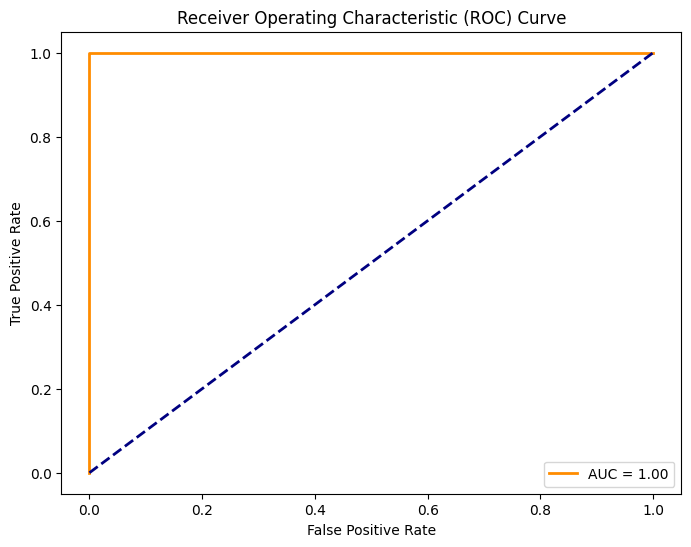

In [70]:
roc_auc = roc_auc_score(y_test, y_test_pred_3)

print(f'CURVA ROC_AUC DEL MODELO 3: MLP Classifier')
print(f'AUC-ROC: {roc_auc:.4f}')

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_3)
roc_auc_curve = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_curve:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

CURVA ROC_AUC DEL MODELO 4: k-Neighbours Classifier
AUC-ROC: 1.0000


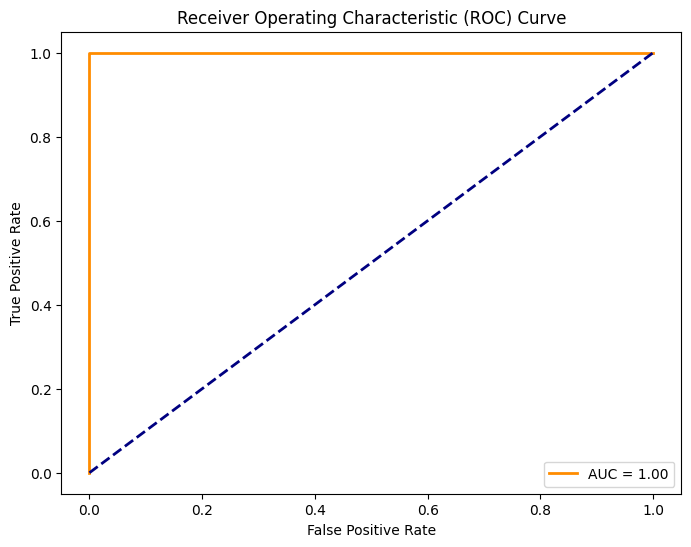

In [71]:
roc_auc = roc_auc_score(y_test, y_test_pred_4)

print(f'CURVA ROC_AUC DEL MODELO 4: k-Neighbours Classifier')
print(f'AUC-ROC: {roc_auc:.4f}')

# Obtener las probabilidades de predicción para la clase positiva
y_prob = model_4.predict_proba(X_test_scaled)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_curve = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_curve:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

It is observed that in both cases, the ROC curves are practically perfect corners (both models have high sensitivity and a low false positive rate at the same time), and the AUC value reaches the maximum of 1.0 (indicating that it can perfectly classify between positive and negative classes).  
______________________________________________________________________  

#### 6. Adjust the hyperparameters of the algorithms used to try to improve the obtained metrics. Has improvement been achieved? Justify why?  
We will now perform a Grid Search to find the best parameter combinations for both models.
  
First, we define our parameter grid:

In [72]:
# Definir la cuadrícula de parámetros a explorar

# Cuadrícula del Grid Search correspondiente al MLP Classifier
param_grid_MLPc = {
    'hidden_layer_sizes': [(16,),(16,16),(32,16)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
}

# Cuadrícula del Grid Search correspondiente al k-Neighbours Classifier

param_grid_kNN = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
}


We define the k-fold object prior to the grid search:  

In [73]:
# Definir el objeto KFold para la validación cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=3)

  
We perform the search for the best parameters for the MLP Classifier:  

In [74]:
# Grid Search para el MPL Classifier con validación cruzada K-fold
grid_search_MLPc = GridSearchCV(estimator=model_3, param_grid=param_grid_MLPc, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search_MLPc.fit(X, y)


GridSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
             estimator=MLPClassifier(hidden_layer_sizes=(16, 16)), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(16,), (16, 16), (32, 16)],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')


We perform the search for the best parameters for the k-Neighbors Classifier:  

In [75]:
# Grid Search para el k-Neighbors Classifier con validación cruzada K-fold
grid_search_kNN = GridSearchCV(estimator=model_4, param_grid=param_grid_kNN, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search_kNN.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [76]:
# Mostrar los mejores hiperparámetros y la precisión del Random Forest Classifier
print("Mejores hiperparámetros para MLP Classifier:", grid_search_MLPc.best_params_)
print("Mejor precisión para MLP Classifier:", grid_search_MLPc.best_score_)

# Mostrar los mejores hiperparámetros y la precisión del Support Vector Classifier (SVC)
print("Mejores hiperparámetros para k-Neighbours Classifier:", grid_search_kNN.best_params_)
print("Mejor precisión para k-Neighbours Classifier:", grid_search_kNN.best_score_)



Mejores hiperparámetros para MLP Classifier: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (16, 16), 'solver': 'adam'}
Mejor precisión para MLP Classifier: 1.0
Mejores hiperparámetros para k-Neighbours Classifier: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Mejor precisión para k-Neighbours Classifier: 0.9977750240947267


We check the improvement in the case of the k-Neighbors Classifier used in sections 3-4 (higher 'Accuracy' than before). 

The reason is that in sections 3-4, the hyperparameters were set almost arbitrarily.  
___  
#### 5. Once the metrics that fit the problem are obtained, interpret them considering everything seen in theory. Which of the two algorithms performed better based on the obtained metrics?  
With the precision metrics obtained, the algorithm that shows slightly better performance is the MLP Classifier. The reasons were discussed in sections 3-4.  
___  
#### 7. Do you think overfitting or underfitting occurs? Why?  
The train and test metrics obtained in the previous sections suggest that both algorithms are generalizing well and do not present issues of overfitting or underfitting.  
___  